In [ ]:
import os
import glob

from tqdm import tqdm

import cshogi
from sklearn.model_selection import train_test_split

In [1]:
L = ["P", "P", "p", "p", "p", "R", "R", "r"]

In [ ]:
csa_file_list = glob.glob(os.path.join("..", "raw_data","*","*.csa"))

In [ ]:
csa_file_list[:10]

In [ ]:
filtered_list = []

kif_num = 0
position_num = 0
filter_moves = 50

board = cshogi.Board()

for file_path in tqdm(csa_file_list):
    for kif in cshogi.Parser.parse_file(file_path):
        if len(kif.moves) < filter_moves:
            continue

        board.set_sfen(kif.sfen)
        try:
            for move_i, move in enumerate(kif.moves):
                if not board.is_legal(move):
                    raise Exception()
                board.push(move)
        except:
            print(f"skip {file_path}")
            continue
        
        filtered_list.append(file_path)
        kif_num += 1
        position_num += len(kif.moves)

print("kif_num", kif_num)
print("position_num", position_num)

In [ ]:
train_file_list, test_file_list = train_test_split(filtered_list, test_size=0.05)

In [ ]:
with open("../preprocessed_data/train_file_path.txt", "w") as f:
    for train_file in train_file_list:
        f.write("%s\n" % train_file)

with open("../preprocessed_data/test_file_path.txt", "w") as f:
    for test_file in test_file_list:
        f.write("%s\n" % test_file)

In [ ]:
len(train_file_list)

In [ ]:
len(test_file_list)

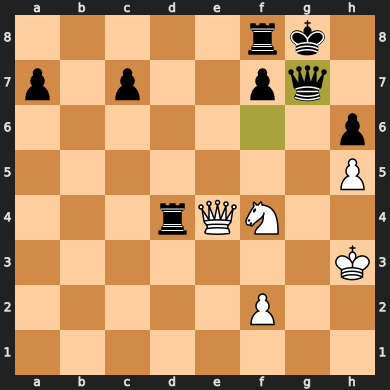


5rk1/p1p2pq1/7p/7P/3rQN2/7K/5P2/8 w - - 0 36


In [29]:
import chess.pgn

pgn = open("13.pgn")

first_game = chess.pgn.read_game(pgn)

board = first_game.board()

for move in first_game.mainline_moves():
    board.push(move)

display(board)
#print(board)
print()
print(board.fen())

In [41]:
from pprint import pprint
board_list = [[] for _ in range(8)]
for row_i, row in enumerate(board.fen().split(" ")[0].split("/")):
    # print(row)
    for char in row:
        # print(char)
        try:
            integer = int(char)
            for none_i in range(integer):
                board_list[row_i].append("")
            # print(integer)
        except:
            board_list[row_i].append(char)
pprint(board_list)

[['', '', '', '', '', 'r', 'k', ''],
 ['p', '', 'p', '', '', 'p', 'q', ''],
 ['', '', '', '', '', '', '', 'p'],
 ['', '', '', '', '', '', '', 'P'],
 ['', '', '', 'r', 'Q', 'N', '', ''],
 ['', '', '', '', '', '', '', 'K'],
 ['', '', '', '', '', 'P', '', ''],
 ['', '', '', '', '', '', '', '']]


In [45]:
batch_size = 1024
features = np.zeros(batch_size, )
piece_list = ['p', 'k', 'b', 'r', 'q', 'k']
COLORS = [WHITE, BLACK] = range(2)
for color in COLORS:
    for piece in piece_list:
        if color == WHITE:
            char = piece.upper()
        else:
            char = piece
        piece_array = [[1 if char == board_list[y][x] else 0 for x in range(8)] for y in range(8)]
        pprint(piece_array)
        print()

[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0]]

[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0]]

[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0]]

[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0]]

[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0

In [ ]:
"+p".upper()

'  9  8  7  6  5  4  3  2  1
P1-KY-KE *  * -OU *  * -KE-KY
P2 * -HI+NG *  *  * -KI-GI * 
P3 * -FU-FU * -FU-FU * -FU-FU
P4 *  *  *  *  *  * -FU *  * 
P5-FU *  *  *  *  *  *  *  * 
P6 *  * +FU *  *  *  *  *  * 
P7+FU+FU * +FU+FU+FU+FU+FU+FU
P8 * +GI *  *  *  *  * +HI * 
P9+KY+KE * +KI+OU+KI+GI+KE+KY
P+00FU
P+00KI
P-00KA00KA
-



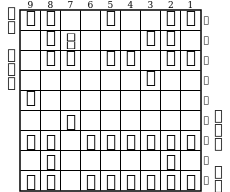

ln2k2nl/1r+S3gs1/1pp1pp1pp/6p2/p8/2P6/PP1PPPPPP/1S5R1/LN1GKGSNL w GP2b 16
[ 89 164  73  33  12 215  86 136 159 195 171   8  11 133 240  40   4  32
  60 214  34 112 253  21  98  57  38 148  48 224 124 191]


In [23]:
import numpy as np
import cshogi
board = cshogi.Board("ln2k2nl/1r+S3gs1/1pp1pp1pp/6p2/p8/2P6/PP1PPPPPP/1S5R1/LN1GKGSNL w GP2b 16")
hcpes = np.zeros(1024, cshogi.HuffmanCodedPosAndEval)
# print(board)
display(board)
# print(board.sfen())
board.to_hcp(hcpes[0]["hcp"])

print(hcpes[0]["hcp"])

with open("../preprocessed_data/initial_position.hcpe", "wb") as f:
    hcpes.tofile(f)

In [ ]:
a_2d = np.arange(12).reshape((3, 4))

In [ ]:
a_2d

In [ ]:
for y in range(3):
    for x in range(4):
        print(a_2d[y][x])

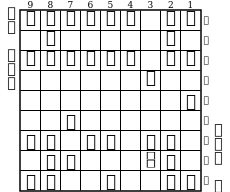

In [28]:
cshogi.Board("lnsgkg1nl/1r5s1/pppppp1pp/6p2/8P/2P6/PP1PP1PP1/1SG3+sR1/LN2K2NL b BBpg 1")

/tmp/ipykernel_2224228/92800387.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(result_values[:, 0], result_values[:, 1], cmap='viridis', alpha=0.7)


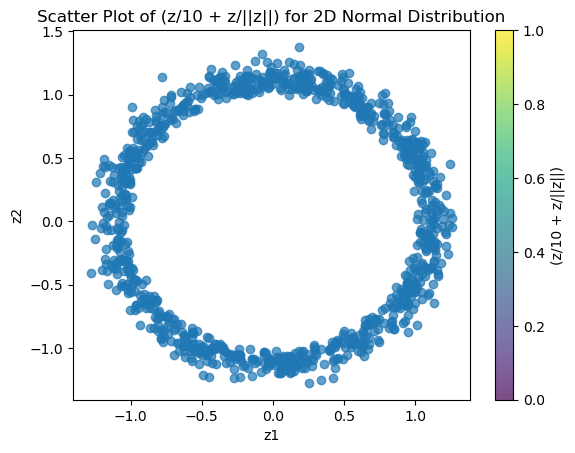

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 二次元正規分布に従う乱数生成
np.random.seed(42)  # 再現性のためにシードを設定
mean = [0, 0]
covariance_matrix = [[1, 0], [0, 1]]
z_values = np.random.multivariate_normal(mean, covariance_matrix, 1000)

# 式の計算
# result_values = z_values / 10 + z_values / np.linalg.norm(z_values, axis=1)[:, np.newaxis]
result_values = z_values / 10 + z_values / np.linalg.norm(z_values, axis=1)[:, np.newaxis]

# プロット
plt.scatter(result_values[:, 0], result_values[:, 1], cmap='viridis', alpha=0.7)
plt.colorbar(label='(z/10 + z/||z||)')
plt.title('Scatter Plot of (z/10 + z/||z||) for 2D Normal Distribution')
plt.xlabel('z1')
plt.ylabel('z2')
plt.show()